## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

## Load the data

In [2]:
file_url = "http://bit.ly/w-data"
raw_data = pd.read_csv(file_url)
raw_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualize the data

In [3]:
raw_data.shape

(25, 2)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
raw_data.isnull().value_counts() # Check to see if there is any missing data

Hours  Scores
False  False     25
dtype: int64

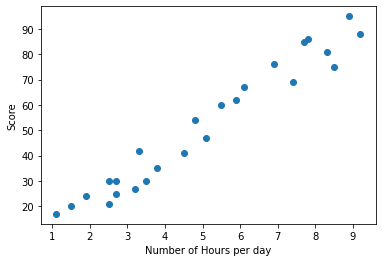

In [7]:
X = raw_data["Hours"]
y = raw_data["Scores"]
plt.scatter(X, y)
plt.xlabel("Number of Hours per day")
plt.ylabel("Score")
plt.show()

There are no outliers or missing values in the data and the data size is too small, so no data preprocessing steps area needed.

## Train-Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=42)

## Data Modeling

In [9]:
X_train.shape

(20,)

In [10]:
X_train = np.asanyarray(X_train).reshape(-1,1)
X_train.shape

(20, 1)

In [11]:
y_train = np.asanyarray(y_train).reshape(-1,1)
y_train.shape

(20, 1)

In [12]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
weight = reg.coef_[0][0]
weight

9.682078154455697

In [14]:
bias = reg.intercept_[0]
bias

2.826892353899737

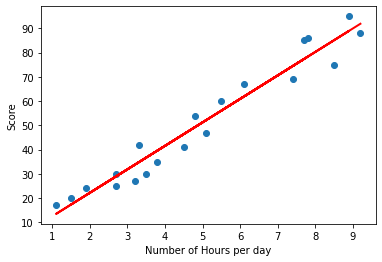

In [15]:
plt.scatter(X_train, y_train)
yhat = bias + weight * X_train
plt.plot(X_train, yhat, c="r", lw=2)
plt.xlabel("Number of Hours per day")
plt.ylabel("Score")
plt.show()

## Model Evaluation

In [16]:
X_test = np.asanyarray(X_test).reshape(-1,1)
y_predicted = reg.predict(X_test)

In [17]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_predicted.reshape(-1,)})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [18]:
print(f"Mean Squared Error: {mse(y_test, y_predicted):0.2f}")

Mean Squared Error: 18.94


In [19]:
print(f"R-Squared: {reg.score(X_test, y_test):0.2f}")

R-Squared: 0.97


In [20]:
print(f"Mean Absolute Error: {mae(y_test, y_predicted):0.2f}")

Mean Absolute Error: 3.92


## Results

In [21]:
prediction = np.array([9.25]).reshape(-1,1)
predicted_score = reg.predict(prediction)
print(f"If a student strudies 9.25hrs/day then he'll get a score of: {predicted_score[0][0]:0.2f}")

If a student strudies 9.25hrs/day then he'll get a score of: 92.39
